# EE511 HW5 
# Name : Royston Marian Mascarenhas


## [MCMC Sampling]

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import beta
from scipy.stats import norm
from scipy.stats import cauchy
from scipy.stats import logistic
from mpl_toolkits import mplot3d


In [139]:
global sigma
sigma = 1

In [140]:
def fx(x):
    try:
        return ((0.6*beta.pdf(x,1,8)) + (0.4*beta.pdf(x,9,1)))      
    except:
        print("x is "+str(x))

In [149]:
def walk(x,prop_type):
    if prop_type=="norm":
        c = norm.pdf(x, loc=0, scale=sigma)
        while(c!=0):
            return (norm.pdf(x, loc=0, scale=sigma))
    elif prop_type =="cauchy":
        c = cauchy.rvs(x, scale=0.1, size=1)[0]
        while(c!=0):
            return c
    elif prop_type =="logistic":
        return logistic.rvs(loc=x, scale=1, size=1)[0]

        

In [168]:
def MH(old):
    new = walk(old,"cauchy")
    A = min(1,(fx(new)/fx(old)))
    toggle = 0
    c1 = np.random.uniform(0,1)
    if (A>c1):
    #print("**")
    #print(A)
    #print(c1)
        old = new
        toggle = 1
    return old, toggle 

In [174]:
def MCMC_sampling(sample_paths,flag,num=0):
    start = np.random.uniform(0,1)
    if (flag==True):
        start = num
    print("started at %.4f"%start)
    sample_list = [start]
    toggle_list = [0]
    toggle_cnt = 0
    for i in range(sample_paths):
        start, toggle = MH(start)
        sample_list.append(start)
        toggle_list.append(toggle)
        toggle_cnt += toggle
    return sample_list, toggle_cnt, toggle_list, start 

In [170]:
a,b,c,d = MCMC_sampling(10000,False,0)

started at 0.4643


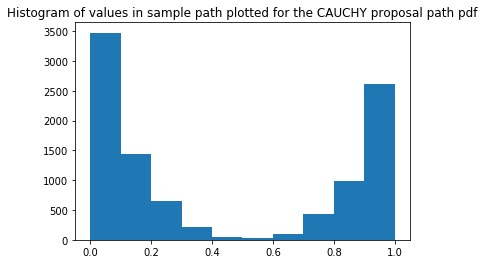

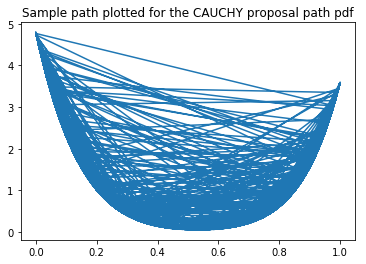

In [171]:
plt.figure(1)
plt.title("Histogram of values in sample path plotted for the CAUCHY proposal path pdf")
plt.hist(a)
plt.figure(2)
plt.title("Sample path plotted for the CAUCHY proposal path pdf")
f = [fx(i) for i in a]
plt.plot(a,f)
#plt.plot(np.linspace(0,1,len(a)),a)

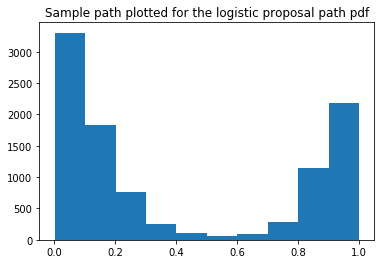

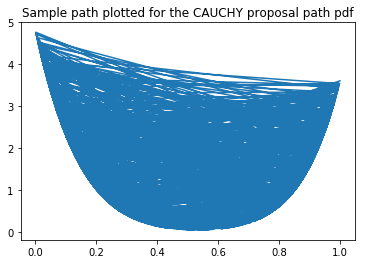

In [167]:
plt.figure(1)
plt.title("Sample path plotted for the logistic proposal path pdf")
plt.hist(a)
plt.figure(2)
plt.title("Sample path plotted for the CAUCHY proposal path pdf")
f = [fx(i) for i in a]
plt.plot(a,f)

#### Running the algorithm from different intial points:

In [178]:
a,b,c,d = MCMC_sampling(10000,True,0.99)

started at 0.9900


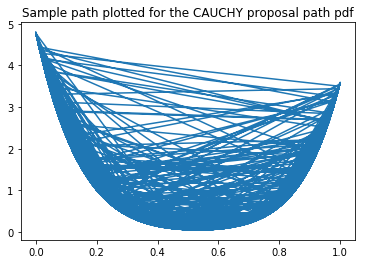

In [179]:
plt.figure(1)
plt.title("Sample path plotted for the CAUCHY proposal path pdf")
f = [fx(i) for i in a]
plt.plot(a,f)

started at 0.0100


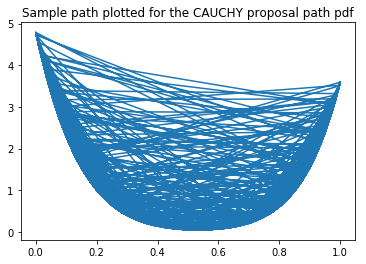

In [180]:
a,b,c,d = MCMC_sampling(10000,True,0.01)
plt.figure(1)
plt.title("Sample path plotted for the CAUCHY proposal path pdf")
f = [fx(i) for i in a]
plt.plot(a,f)

started at 0.5000


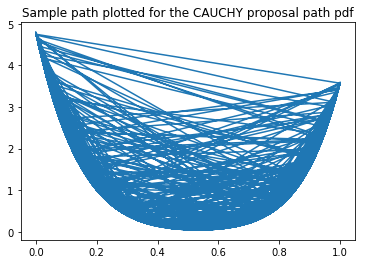

In [181]:
a,b,c,d = MCMC_sampling(10000,True,0.5)
plt.figure(1)
plt.title("Sample path plotted for the CAUCHY proposal path pdf")
f = [fx(i) for i in a]
plt.plot(a,f)

> Algorithm

1. Start at an initial point
2. Pass the sample to a proposal pdf generator. Store old and new values. 
3. Generate the standing probability by using a kernel pdf (new) / kernel pdf (old) ratio
4. Accept the sample if the probability is more than a random generated probability

> Discussion:

From the plotted sample path, we observe that in the logistic case, it is easier to observe that algorithm converges to its equilibrium distribution. <br>

With respect to initial point, smaller the initial point, the more time it takes to converge. <br> <br>

Variance case: The logistic proposal pdf has a higher variance than the Cauchy proposal pdf. Therefore, convergence is more imminent in the Cauchy proposal pdf case. <br> <br>

The initial point of every algorithm is mentioned before the results are displayed.

# [MCMC for Optimization]


In [3]:
class MCMC_opt():
    def __init__(self,temp=20,coolingSchedule="exp",n=10000):
        self.temp = temp
        self.coolingSchedule = coolingSchedule
        self.n = n
    
    def graphic(self,flag=False,flag2=True):
        n = 2
        x1 = np.arange(-500, 500, 0.1)
        x2 = np.arange(-500, 500, 0.1)
        x1n, x2n = np.meshgrid(x1, x2, sparse=True)             

        #z = [self.cost_machine([x1n[i],x2n[i]]) for i in range(len(x1n))]
        z = (418.982 * n) - ((x1n * np.sin(np.sqrt(abs(x1n)))) + (x2n * np.sin(np.sqrt(abs(x2n)))))
        
        if flag==True:
            fig = plt.figure()
            ax = fig.gca(projection='3d')
            ax.plot_surface(x1, x2, z, cmap="gnuplot2",linewidth=0, antialiased=False)
            plt.title('Cost Function')
        
        plt.figure()
        plt.contourf(x1,x2,z,cmap='twilight')
        plt.title('Contour Plot')
        if(flag2==True):
            plt.plot(self.pltLst[:,0],self.pltLst[:,1],marker='D',color='yellow')
        plt.colorbar()
        
        
    def gen_samples(self,a=-500,b=500,n=2):
        res = np.random.uniform(a,b,size=n)
        return res
            
    def prop(self,old):
        while True:
            res = np.random.normal(loc=old, scale=sigma)
            if (res[0]>-500 and res[0]<500 and res[1]>-500 and res[1]<500):
                break
        return res
            
    def cool(self,factor):
        if self.coolingSchedule == "log":
            res = self.temp/np.log(factor+1)
        elif self.coolingSchedule == "poly":
            const = -0.75
            res = self.temp * ((factor+1)**(-const))
        elif self.coolingSchedule == "exp":
            res = self.temp / (np.exp(1+factor))
            return res
        
    def start(self):
        start = self.gen_samples()
        sampleLst = []
        sampleLst.append(start)
        factor = 1
        print("Started at {0}".format(start))
        for i in range(0,self.n):
            old = sampleLst[factor-1]
            new = self.prop(old)
            t = self.cool(factor)
            newCost,oldCost,prob = self.acceptance(new,old,t)
            if (newCost<oldCost) or (prob>np.random.uniform()):
                sampleLst.append(new)
                factor = factor + 1
        self.pltLst = np.array(sampleLst)
        print("Converged at point: {0}".format(sampleLst[-1]))
        return sampleLst
    
    def acceptance(self,new,old,T):
        newCost = self.cost_machine(new)
        oldCost = self.cost_machine(old)
        choice = np.exp (-1*(newCost - oldCost)/self.temp)
        prob = min(1,choice)
        return newCost,oldCost,prob
    
    def cost_machine(self,temp):
        x = temp[0]
        y = temp[1]
        n = 2        
        if ((x >= -500) & (y <= 500) & (x >= -500) & (y <= 500)):
            return (418.9829*n - ((x*np.sin(np.sqrt(abs(x)))) + (y*np.sin(np.sqrt(abs(y))))))   
        
        
        
        
        

In [56]:
obj = MCMC_opt()

Started at [-36.18180306 -59.41289699]
Converged at point: [426.99289076 416.24926008]


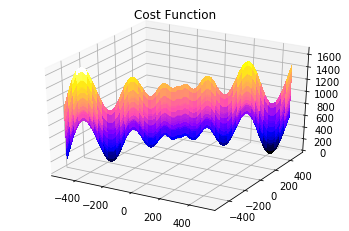

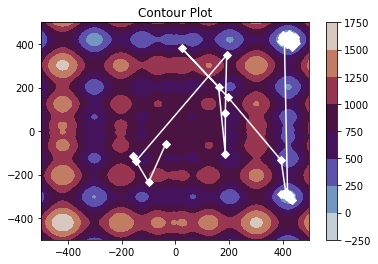

In [57]:
sigma = 200
obj.start()
obj.graphic(True,flag2=True)

## (i) and (ii) Contour plot 

Started at [ 401.25020991 -108.04222577]
Converged at point: [ 413.99012176 -318.2910949 ]


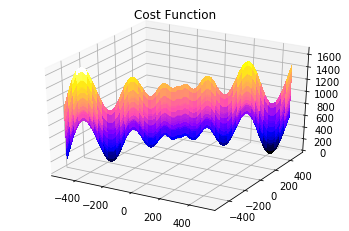

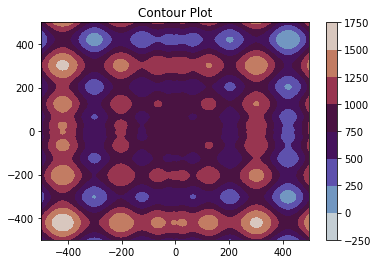

In [58]:
obj = MCMC_opt(temp=20,coolingSchedule="exp",n=100)
sigma = 200
obj.start()
obj.graphic(True,flag2=False)

## iii)
## Exponential Cooling Schedule 

Started at [-259.93408001 -329.12120673]
Converged at point: [-271.3657698  -298.45363618]


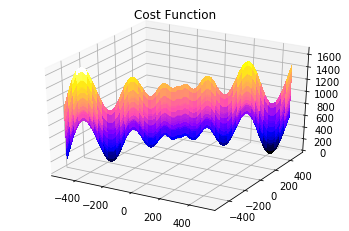

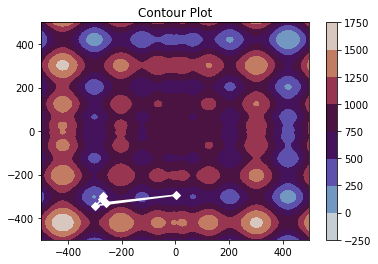

In [60]:
obj = MCMC_opt(temp=30,coolingSchedule="exp",n=100)
sigma = 200
obj.start()
obj.graphic(True,flag2=True)

## Logarithmic Cooling Schedule

Started at [ 347.43948268 -415.88642166]
Converged at point: [409.98231066 398.08883574]


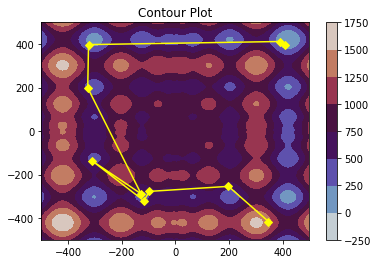

In [62]:
obj = MCMC_opt(temp=20,coolingSchedule="log",n=100)
sigma = 200
obj.start()
obj.graphic(False,flag2=True)

## Polynomial Cooling SChedule 

Started at [133.1607219   55.25493064]
Converged at point: [ 395.80604097 -320.85181653]


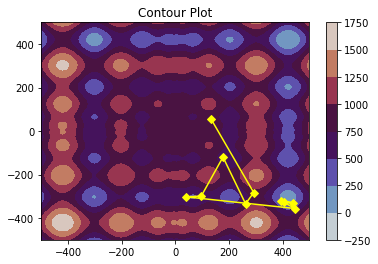

In [4]:
obj = MCMC_opt(temp=20,coolingSchedule="poly",n=100)
sigma = 200
obj.start()
obj.graphic(False,flag2=True)

## 
## Different temperatures

## t = 20

Started at [-440.31388326 -423.65558224]
Converged at point: [ 427.28238602 -326.67866529]


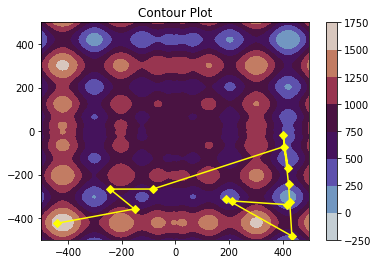

In [5]:
obj = MCMC_opt(temp=20,coolingSchedule="exp",n=100)
sigma = 200
obj.start()
obj.graphic(False,flag2=True)

## t = 50

Started at [-154.90255741 -124.49612218]
Converged at point: [-323.95439706  192.51754831]


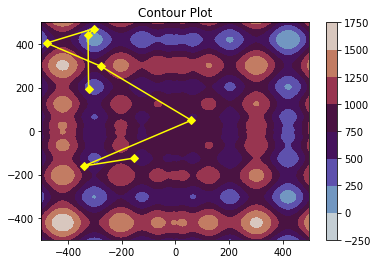

In [4]:
obj = MCMC_opt(temp=50,coolingSchedule="exp",n=100)
sigma = 200
obj.start()
obj.graphic(False,flag2=True)

## t = 100

Started at [ 219.00112231 -281.43386851]
Converged at point: [ 407.9625068  -300.45442743]


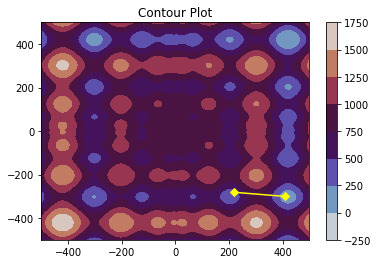

In [5]:
obj = MCMC_opt(temp=100,coolingSchedule="exp",n=100)
sigma = 200
obj.start()
obj.graphic(False,flag2=True)

## t = 1000

Started at [ 380.16251796 -182.77432032]
Converged at point: [75.65683452 74.17089118]


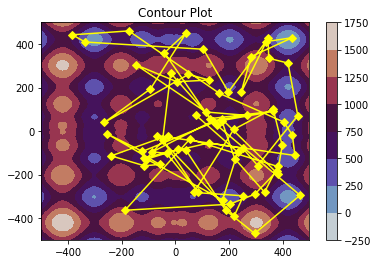

In [6]:
obj = MCMC_opt(temp=500,coolingSchedule="exp",n=100)
sigma = 200
obj.start()
obj.graphic(False,flag2=True)

### Algorithm:

1. Choose the parameters of the annealing task such as temperature, rate of decay, number of runs.
2. Choose an initial sample
3. Pass it to a proposal pdf and create a new sample
4. Compute the cost of the old and new samples
5. If the acceptance probability allows, change the state of the old sample to the new sample
6. Repeat for the required number of iteratons
7. Plot relevant graphs

### Discussion :

- Different cooling schedules introduce different rates of decay for the temperature
<br>
- SLower the temperature decay, slower the convergence, but more accurate the global minimum  <br>
- Higher the temperature, more the run time as higher temperature has to decay down below threshold. As a result, the algorithm keeps toggling between different minimas.<br>
- In algebraic space, as the temperature slowly goes down to 0, only a single spike of probability can be seen. This is where the global minimum is. <br>

